In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
# Ruta de archivo CSV
ruta = pd.read_csv('retail_sales_dataset.csv')
# Convertir a DataFrame
df = pd.DataFrame(ruta)
# Mostrar los primeros registros
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [2]:
# Mostrar informaciones del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [3]:
# Copiar el DataFrame a uno nuevo de limpieza
df_limpio = df.copy()

# Eliminar las columnas menos representativas
df_limpio = df_limpio.drop(['Transaction ID', 'Customer ID'], axis=1)

# Convertir el campo Fecha en tipo Date
df_limpio['Date'] = pd.to_datetime(df_limpio['Date'])

# Tipos de variable con la nueva distribución
numerical = df_limpio.select_dtypes(include=['float64', 'int64']).columns
categorical = df_limpio.select_dtypes(include=['object', 'category']).columns
datetimed = df_limpio.select_dtypes(include=['datetime64']).columns

# Convertir columnas categoricas a tipo 'category'
df_limpio[categorical] = df_limpio[categorical].astype('category')

# Contar datos duplicardos
df_limpio.duplicated().sum()

0

In [4]:
# Mostrar informaciones del DataFrame
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   category      
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   category      
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 41.4 KB


In [5]:
# Verificar variables nulos
df_limpio.isnull().sum()

,0
Date,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


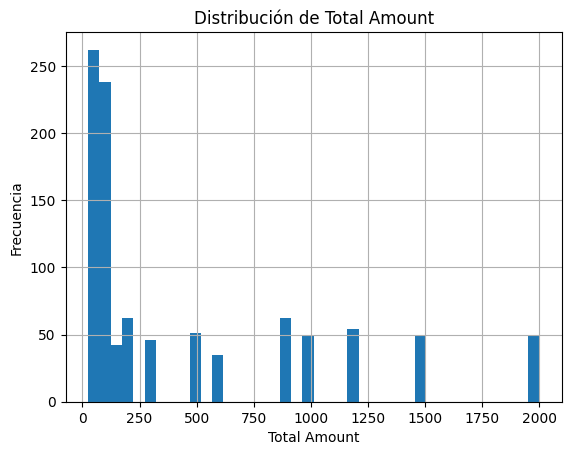

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
df_limpio['Total Amount'].hist(bins=40)
plt.title('Distribución de Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frecuencia')
plt.show()

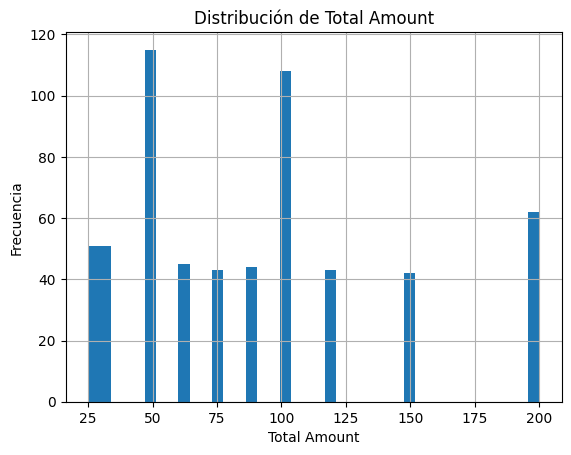

In [7]:
# Gráfico de barras
df_limpio[df_limpio['Total Amount']<250]['Total Amount'].hist(bins=40)
plt.title('Distribución de Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
p33 =df_limpio['Total Amount'].quantile(0.33)
p66 =df_limpio['Total Amount'].quantile(0.66)
print(p33)
print(p66)

90.0
500.0


In [9]:
p33 = df_limpio['Total Amount'].quantile(0.33)
p66 = df_limpio['Total Amount'].quantile(0.66)

# Crear una nueva columna 'Amount Category' basada en los percentiles
df_limpio['Amount Category'] = pd.cut(df_limpio['Total Amount'],
                               bins=[-float('inf'), p33, p66, float('inf')],
                               labels=['Bajo', 'Medio', 'Alto'])

# Verificar el resultado
print(df_limpio[['Total Amount', 'Amount Category']].head())

   Total Amount Amount Category
0           150           Medio
1          1000            Alto
2            30            Bajo
3           500           Medio
4           100           Medio


In [10]:
df_limpio.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Amount Category
0,2023-11-24,Male,34,Beauty,3,50,150,Medio
1,2023-02-27,Female,26,Clothing,2,500,1000,Alto
2,2023-01-13,Male,50,Electronics,1,30,30,Bajo
3,2023-05-21,Male,37,Clothing,1,500,500,Medio
4,2023-05-06,Male,30,Beauty,2,50,100,Medio


In [11]:
#outliers

# Función para identificar outliers usando IQR
def identify_outliers_iqr(df_limpio, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df_limpio[col].quantile(0.25)
        Q3 = df_limpio[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df_limpio[(df_limpio[col] < lower_bound) | (df_limpio[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df_limpio, numerical)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 0
Porcentaje de outliers: 0.00%


                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


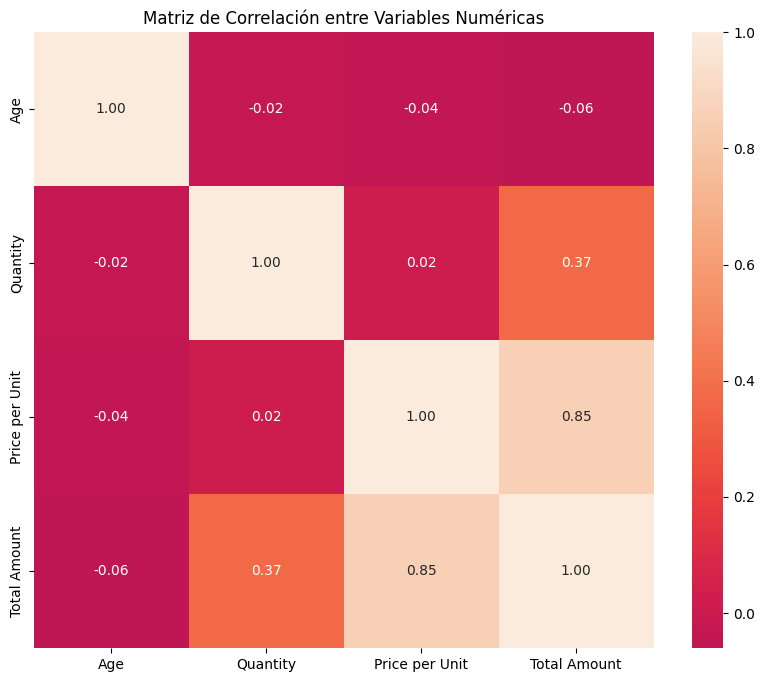

In [17]:
#correlacion

import matplotlib.pyplot as plt
import seaborn as sns

# Correlación de los datos numéricos
correlation_matrix = df_limpio[numerical].corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación con nueva paleta de colores
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


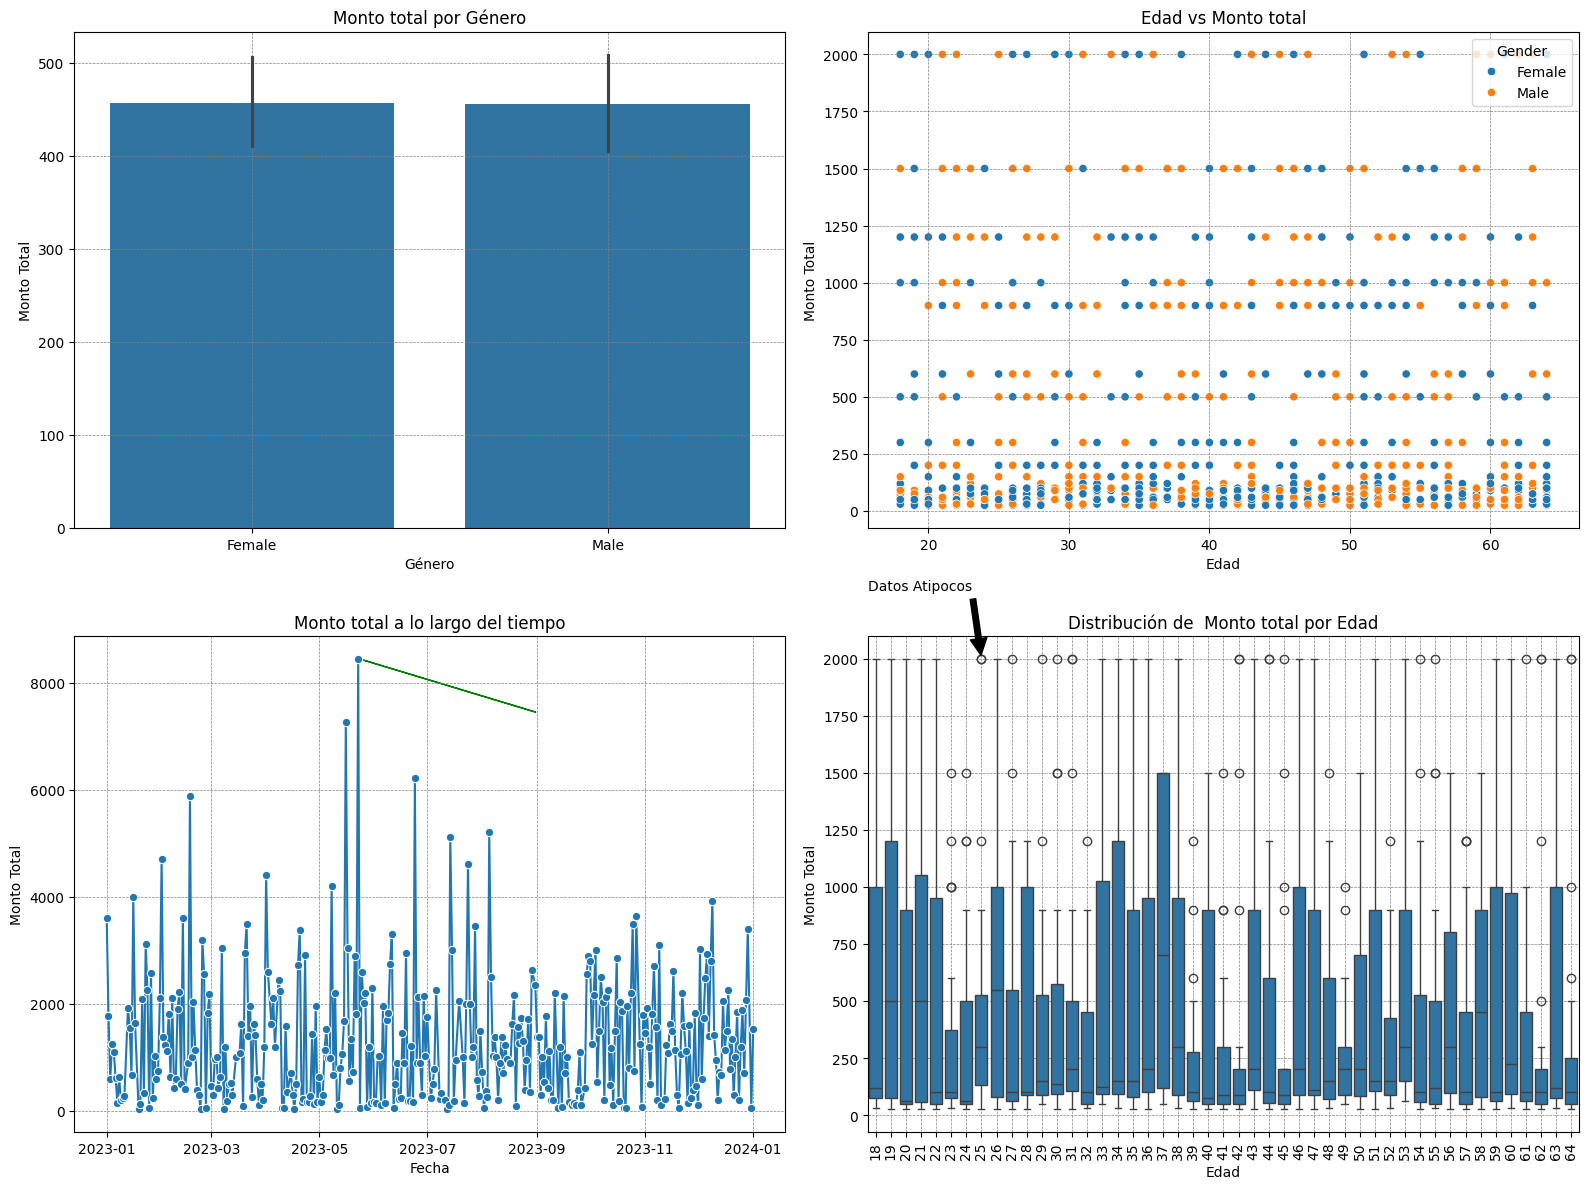

In [18]:
#visualizacion

# Crear una figura con varios subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gráfico de barras: Monto total por Genero
sns.barplot(data=df_limpio, x='Gender', y='Total Amount', ax=axs[0, 0])
axs[0, 0].set_title('Monto total por Género')
axs[0, 0].set_xlabel('Género')
axs[0, 0].set_ylabel('Monto Total')
axs[0, 0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# 2. Gráfico de dispersión: Edad vs Monto total
sns.scatterplot(data=df_limpio, x='Age', y='Total Amount', hue='Gender', ax=axs[0, 1])
axs[0, 1].set_title('Edad vs Monto total')
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('Monto Total')
axs[0, 1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# 3. Gráfico de líneas: Monto total a lo largo del tiempo
group_date = df_limpio.groupby('Date', observed=False)['Total Amount'].sum().reset_index()
sns.lineplot(data=group_date, x='Date', y='Total Amount', marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Monto total a lo largo del tiempo')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Monto Total')
axs[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Encontrar el valor máximo y la fecha correspondiente
max_value = group_date['Total Amount'].max()
max_date = group_date[group_date['Total Amount'] == max_value]['Date'].values[0]

# Ajustar flecha (posicionar desde un punto bajo hacia un punto más alto)
axs[1, 0].arrow(max_date, max_value, 100, -1000, head_width=0.8, head_length=2.5, fc='green', ec='green')

# 4. Gráfico de cajas: Distribución de Monto total por Edad
sns.boxplot(data=df_limpio, x='Age', y='Total Amount', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de  Monto total por Edad')
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('Monto Total')
axs[1, 1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
axs[1, 1].tick_params(axis='x', rotation=90)

# datos atipicos
axs[1, 1].annotate('Datos Atipocos', xy=(7, 2000), xytext=(-0.5, 2300),
                   arrowprops=dict(facecolor='black', shrink=0.05))

# Ajustar el layout
plt.tight_layout()
plt.show()

In [19]:
#Preprocesamiento de Datos

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# Tipos de variable con la nueva distribución
categorical_cols  = ['Gender', 'Product Category']
numerical_cols  = ['Quantity', 'Price per Unit']
amount_category = ['Amount Category']

# Crear transformaciones específicas para cada tipo de columna
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
amount_category_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['Bajo', 'Medio', 'Alto']]))
])

# Crear el ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols),
        ('ord', amount_category_transformer, amount_category)
    ]
)

# Crear el pipeline final
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el preprocesamiento al DataFrame
df_transform = pipeline.fit_transform(df_limpio)

# Convertir el resultado a un DataFrame para una vista clara
df_transform = pd.DataFrame(df_transform, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

# Mostrar los primeros registros
df_transform.head()

,cat__Gender_Male,cat__Product Category_Clothing,cat__Product Category_Electronics,num__Quantity,num__Price per Unit,ord__Amount Category
0,1.0,0.0,0.0,0.429265,-0.685123,1.0
1,0.0,1.0,0.0,-0.453996,1.688464,2.0
2,1.0,0.0,1.0,-1.337258,-0.790615,0.0
3,1.0,1.0,0.0,-1.337258,1.688464,1.0
4,1.0,0.0,0.0,-0.453996,-0.685123,1.0


In [20]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cat__Gender_Male                   1000 non-null   float64
 1   cat__Product Category_Clothing     1000 non-null   float64
 2   cat__Product Category_Electronics  1000 non-null   float64
 3   num__Quantity                      1000 non-null   float64
 4   num__Price per Unit                1000 non-null   float64
 5   ord__Amount Category               1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


Benchmarking de Técnicas de Machine Learning

In [21]:
#División del conjunto de datos en entrenamiento y prueba.

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_transform.drop(['ord__Amount Category'], axis=1)
y = df_transform['ord__Amount Category']

# Dividir los datos en conjunto de entrenamiento (70%) y de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#exploracion
# Contar las clases en el DataFrame original
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100  # Porcentaje de cada clase

# Combinar en un DataFrame para mejor presentación
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
}).reset_index()

# Renombrar las columnas
class_distribution.columns = ['Class', 'Count', 'Percentage']

# Imprimir la distribución de clases
print("Distribución de clases en el DataFrame original:")
print(class_distribution)

# Verificar la distribución de las clases en y_train e y_test
print("\nDistribución en y_train:")
print(y_train.value_counts())
print("\nDistribución en y_test:")
print(y_test.value_counts())

Distribución de clases en el DataFrame original:
   Class  Count  Percentage
0    1.0    352        35.2
1    0.0    349        34.9
2    2.0    299        29.9

Distribución en y_train:
ord__Amount Category
0.0    254
1.0    236
2.0    210
Name: count, dtype: int64

Distribución en y_test:
ord__Amount Category
1.0    116
0.0     95
2.0     89
Name: count, dtype: int64


In [23]:
# Columnas de df
df_transform.columns

Index(['cat__Gender_Male', 'cat__Product Category_Clothing',
       'cat__Product Category_Electronics', 'num__Quantity',
       'num__Price per Unit', 'ord__Amount Category'],
      dtype='object')

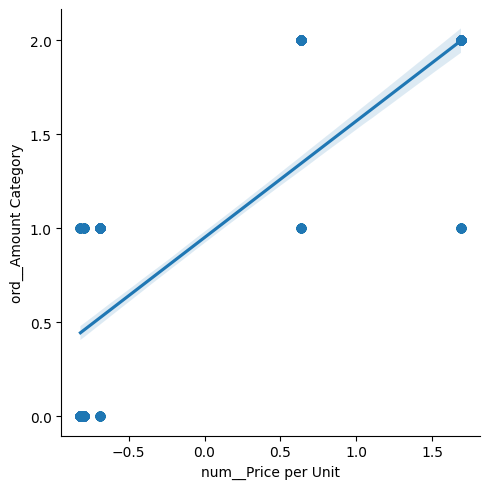

In [24]:
sns.lmplot(x='num__Price per Unit', y='ord__Amount Category', data=df_transform)

In [25]:
#Modelos y comparación utilizando métricas de rendimiento

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

results = {}

# Definición de los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# laber
labels = ['Bajo', 'Medio', 'Alto']

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    # Crear el pipeline
    pipeline = Pipeline(steps=[('classifier', model)])

    # Entrenar el modelo
    pipeline.fit(X_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = pipeline.predict(X_test)

    # Evaluación del modelo
    accuracy = accuracy_score(y_test, y_pred)
    f1_score = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=labels, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

    # Guardar los resultados en el diccionario
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": class_report,
        "confusion_matrix": confusion,
        "y_pred": y_pred,
        "model": model
    }

    # Mostrar el reporte de clasificación y la matriz de confusión
    print(f"\nModelo: {model_name}")
    print("Exactitud:", accuracy)
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=labels))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred, labels=[0, 1, 2]))


Modelo: Logistic Regression
Exactitud: 0.8666666666666667
Reporte de clasificación:
               precision    recall  f1-score   support

        Bajo       0.86      0.87      0.86        95
       Medio       0.83      0.83      0.83       116
        Alto       0.93      0.91      0.92        89

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

Matriz de confusión:
 [[83 12  0]
 [14 96  6]
 [ 0  8 81]]

Modelo: K-Nearest Neighbors
Exactitud: 0.9766666666666667
Reporte de clasificación:
               precision    recall  f1-score   support

        Bajo       0.98      1.00      0.99        95
       Medio       1.00      0.94      0.97       116
        Alto       0.95      1.00      0.97        89

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Matriz 

In [26]:
#validacion

from sklearn.model_selection import cross_val_score

# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Realizar validación cruzada y mostrar los resultados
for model_name, model in models.items():
    # Crear el pipeline
    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])

    # Validación cruzada
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Mostrar resultados
    print(f"\nModelo: {model_name}")
    print(f"Exactitud promedio de validación cruzada: {cv_scores.mean():.4f}")
    print(f"Desviación estándar de validación cruzada: {cv_scores.std():.4f}")
    print(f"Exactitud por partición: {cv_scores}")


Modelo: Logistic Regression
Exactitud promedio de validación cruzada: 0.8257
Desviación estándar de validación cruzada: 0.0369
Exactitud por partición: [0.86428571 0.79285714 0.85714286 0.77142857 0.84285714]

Modelo: K-Nearest Neighbors
Exactitud promedio de validación cruzada: 0.9486
Desviación estándar de validación cruzada: 0.0336
Exactitud por partición: [0.97857143 0.96428571 0.94285714 0.97142857 0.88571429]

Modelo: Decision Tree
Exactitud promedio de validación cruzada: 1.0000
Desviación estándar de validación cruzada: 0.0000
Exactitud por partición: [1. 1. 1. 1. 1.]


In [27]:
#mejor modelo

# Seleccionar el modelo con la mejor exactitud (Accuracy)
best_model_accuracy = max(results, key=lambda model: results[model]["accuracy"])
best_accuracy_value = results[best_model_accuracy]["accuracy"]
print(f"\nEl mejor modelo basado en la exactitud es: {best_model_accuracy} con exactitud: {best_accuracy_value:.2f}")

# Comparar los modelos según métricas del reporte de clasificación (por ejemplo, F1-Score)
best_model_f1_score = max(results, key=lambda model: results[model]["classification_report"]['weighted avg']['f1-score'])
best_f1_score_value = results[best_model_f1_score]["classification_report"]['weighted avg']['f1-score']
print(f"El mejor modelo basado en el F1-Score es: {best_model_f1_score} con F1-Score: {best_f1_score_value:.2f}")


El mejor modelo basado en la exactitud es: Decision Tree con exactitud: 1.00
El mejor modelo basado en el F1-Score es: Decision Tree con F1-Score: 1.00



Reporte de clasificación: Logistic Regression

              precision    recall  f1-score   support

        Bajo       0.86      0.87      0.86        95
       Medio       0.83      0.83      0.83       116
        Alto       0.93      0.91      0.92        89

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



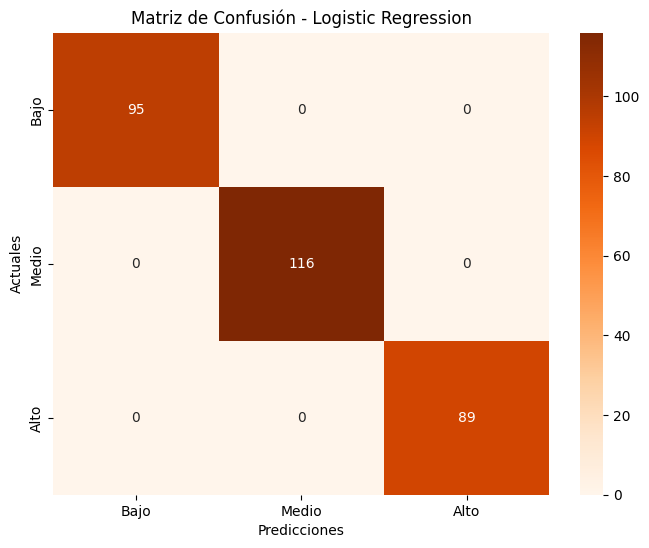


Reporte de clasificación: K-Nearest Neighbors

              precision    recall  f1-score   support

        Bajo       0.98      1.00      0.99        95
       Medio       1.00      0.94      0.97       116
        Alto       0.95      1.00      0.97        89

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



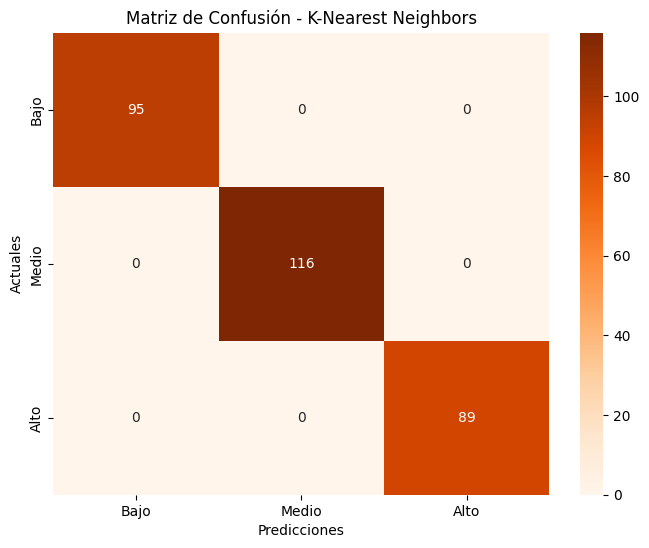


Reporte de clasificación: Decision Tree

              precision    recall  f1-score   support

        Bajo       1.00      1.00      1.00        95
       Medio       1.00      1.00      1.00       116
        Alto       1.00      1.00      1.00        89

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



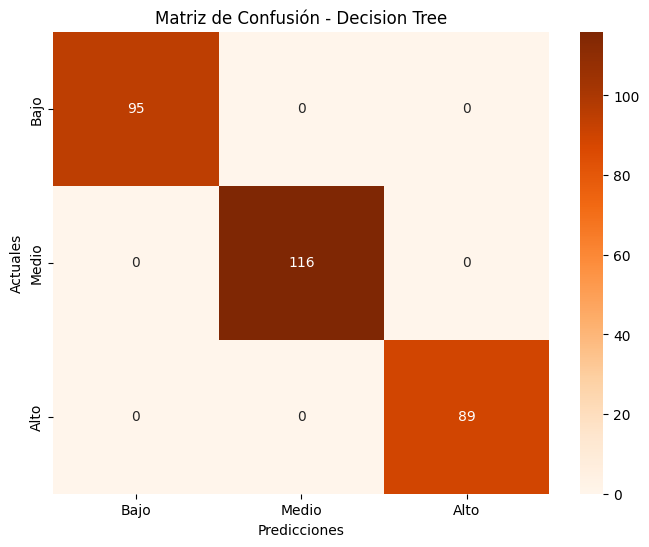

In [30]:
#Análisis de Métricas

from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for model_name, model_results in results.items():
    # Obtener las predicciones guardadas
    y_pred = model_results["y_pred"]

    # Obtener el reporte de clasificación
    class_report = classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=labels)
    print(f"\nReporte de clasificación: {model_name}\n")
    print(class_report)

    # Visualización de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicciones')
    plt.ylabel('Actuales')
    plt.show()


--- Informe ROC-AUC para el modelo: Logistic Regression ---
ROC-AUC Promedio (Macro) para Logistic Regression: 0.9667


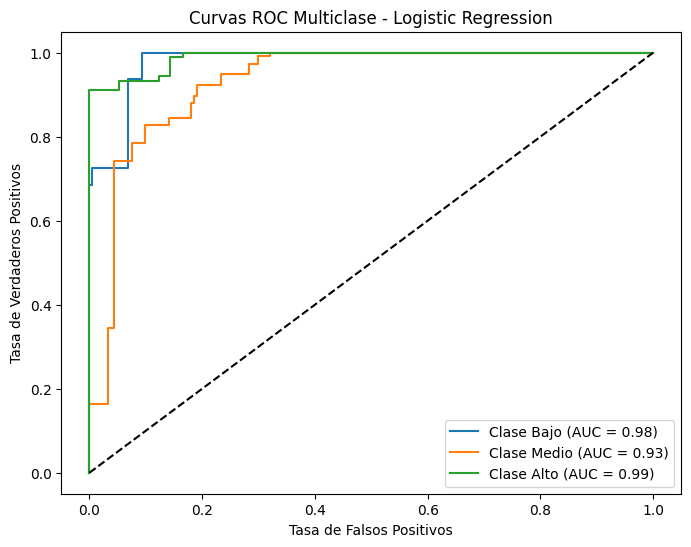


--- Informe ROC-AUC para el modelo: K-Nearest Neighbors ---
ROC-AUC Promedio (Macro) para K-Nearest Neighbors: 1.0000


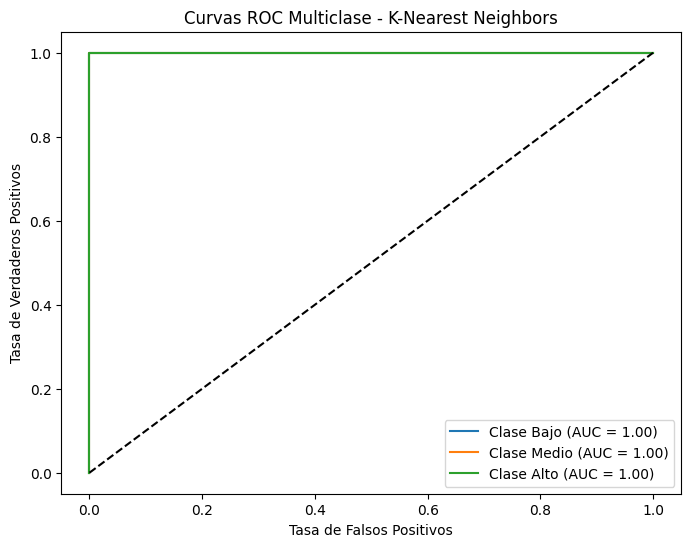


--- Informe ROC-AUC para el modelo: Decision Tree ---
ROC-AUC Promedio (Macro) para Decision Tree: 1.0000


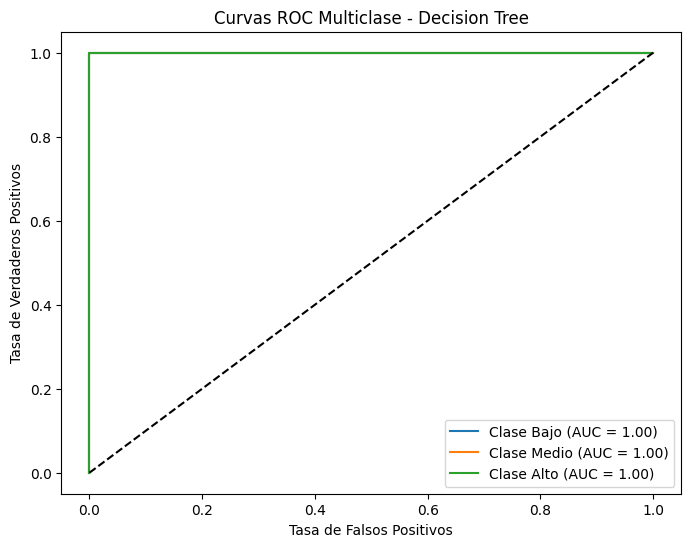

In [31]:
#Curva ROC y AUC

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarización de las etiquetas (si no se ha hecho antes)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Suponiendo que ya tienes un diccionario de resultados `results` con modelos entrenados y evaluados
for model_name, model_results in results.items():
    print(f"\n--- Informe ROC-AUC para el modelo: {model_name} ---")

    # Si el modelo es Logistic Regression, KNN o Decision Tree, calcular el ROC-AUC
    if model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']:
        model = model_results['model']  # Acceder al modelo entrenado

        try:
            y_pred_proba = model.predict_proba(X_test)  # Obtener las probabilidades de predicción

            # Calcular el ROC-AUC promedio (macro)
            roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average="macro", multi_class="ovr")
            print(f"ROC-AUC Promedio (Macro) para {model_name}: {roc_auc:.4f}")

            # Graficar las curvas ROC para cada clase
            plt.figure(figsize=(8, 6))

            # Graficar la curva ROC para cada clase
            for i, class_name in enumerate(labels):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
                plt.plot(fpr, tpr, label=f'Clase {class_name} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.2f})')

            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f'Curvas ROC Multiclase - {model_name}')
            plt.xlabel('Tasa de Falsos Positivos')
            plt.ylabel('Tasa de Verdaderos Positivos')
            plt.legend(loc='best')
            plt.show()
        except Exception as e:
            print(f"No se pudo generar ROC-AUC para {model_name}: {e}")
